# End-to-End Projekt: Vorhersage des Überlebens auf der Titanic

<hr style="border:1px solid gray"> </hr>

## Inhalt

0. [Einleitung und CRISP-DM](#kap0)


1. [Geschäftsverständnis](#kap1)  


2. [Datenverständnis](#kap2)    


3. [Datenvorbereitung](#kap3)  
    3.1 [Aufteilung in Trainings- und Testdatensatz](#kap31)  
    3.2 [Erste Merkmalsauswahl](#kap32)   
    

4. [Modellierung](#kap4)  
    4.1 [Modellgüte](#kap41)  
    4.2 [Iteration zu den vorhergehenden Schritten](#kap42)  


5. [Evaluation](#kap5)


6. [Bereitstellung](#kap6)

<hr style="border:1px solid gray"> </hr>

## 0. Einleitung und CRISP-DM <a name="kap0"></a>

In diesem Jupyter Notebook soll zunächst der Ablauf eines typischen Projektes in Data Mining an einem kleinen Beispiel demonstriert werden. Dabei werden die typischen Schritte eines solchen Projektes analog zum CRISP-DM Modell durchgeführt und kurz erläutert, um einen Überblick zu geben und anschließend durchgeführt. Detaillierte Erläuterungen zu den einzelnen Schritte folgen in den späteren Modulen. 

<img src="dm00.png" style="height:500px">

## 1. Geschäftsverständnis <a name="kap1"></a>

Der erste Schritt in einem Data Mining Projekt ist die genaue Formulierung der Aufgabe. In allgemeinen Anwendungen wird eine Geschäftsidee formuliert oder ein Problem einer Fachabteilung vorgetragen. Diese sollten mit Hilfe von Daten lösbar sein.  
In Industrieanwendungen wird dieser Schritt oft von interdisziplinären Arbeitsgruppen, bestehend aus der Fachabteilung und der Data Science-Abteilung, entwickelt.  

<hr style="border:4px solid lightblue"> </hr> 

### Die Aufgabe 

Der 15. April 2023 ist das 111. Jubiläum einer der berühmtesten Katastrophen der Seefahrt: Die RMS Titanic kollidierte auf ihrer Jungfernfahrt am 14. April 1912 mit einem Eisberg und versank wenige Stunden später im Nordatlantik. Dabei kamen über 60% der an Bord befindlichen Reisenden ums Leben.  

Im Rahmen des Jubiläums plant eine Produktionsfirma einen neuen Dokumentarfilm, der neue Erkenntnisse der Titanic-Forschung enthüllen und mit Gerüchten und Mythen um die Titanic aufräumen soll. Im Zuge der Produktion soll ein umfangreiches Medienangebot erstellt werden, unter anderem ein Virtual Reality (VR) - Erlebnis, bei dem Nutzer:innen selbst in die Welt der Titanic eintauchen und erleben können, wie sich die Fahrt auf der Titanic, aber auch deren Untergang ereignet hat.  
Zu Beginn der Simulation wählen die Nutzer:innen verschiedene Merkmale des Charakters aus (beispielsweise Alter, Geschlecht und Passagierklasse). Ein Vorhersagemodell soll anhand dieser Auswahldaten entscheiden, ob der Charakter überlebt oder nicht. Je nach Wahl werden den Nutzer:innen unterschiedliche Endsequenzen eingespielt.  

Die Aufgabe Ihres Data Mining Teams besteht nun darin, ein Vorhersagemodell aufgrund vorliegender Daten zu entwickeln, das ausgehend von allgemeinen Merkmalen ein Überleben oder Nichtüberleben vorhersagt und damit die Grundlage für die Sequenzwahl im VR-Erlebnis bildet.

<hr style="border:4px solid lightblue"> </hr> 

Es handelt sich in diesem Fall um ein Klassifikationsmodell, da zwei Ergebnisklassen, nämlich 'überlebt' und 'nicht überlebt', existieren. In späteren Modulen des Kurses werden weitere Arten von Vorhersagemodellen thematisiert. Bei anderen Arten von Vorhersagemodellen sehen einzelne Ausgestaltungen der CRISP-DM Arbeitsbereiche unterschiedlich aus, die allgemeine Bedeutung der einzelnen Arbeitsbereiche bleibt aber gleich. 

Der Plan zur Erstellung des Modells ist, anhand der üblichen Schritte im CRISP-DM die Datengrundlage zu erforschen und dann Merkmale und einen Ansatz für eine Modellierung auszuwählen, sowie die Modellierung im Nachhinein bezüglich bestimmter Merkmale zu beurteilen und ggf. zu optimieren. 

<div class="alert alert-block alert-warning">
<b>Ergebnissicherung:</b> <br>
     - Der Arbeitsbereich Geschäftsverständnis dient dazu, ausgehend von der Fragestellung die Anforderungen und Ziele für das Data Mining Projekt zu formulieren. Die Vorgehensweise wird dabei geplant und in einer ersten Version festgelegt werden. <br>
    - Ein Klassifikationsmodell ist ein Modell, welches ausgehend von einem Datensatz ein Modell erstellt, das die Kategorie (Klasse) bestimmter Beispiele vorhersagen kann. 
</div>

##  2. Datenverständnis (Data Understanding) <a name="kap2"></a>

Ausgangspunkt für die Bearbeitung eines Data Mining Projekts sind selbstverständlich unterschiedliche Daten. In vielen Anwendungen, gerade im industriellen Kontext, ist es aufwändig, die passenden Daten zu finden und sie eventuell aus mehreren Quellen zusammen zu führen. 

Für das hier thematisierte Beispiel werden Informationen über die allgemeinen Merkmale der Reisenden und über die Frage, ob sie überlebt haben oder nicht, benötigt. Ein Datensatz mit diesen Inhalten ist bei den zu diesem Video gehörenden Materialien zu finden und kann dort heruntergeladen werden. Der Datensatz ist aus mehreren Originaldaten von https://www.kaggle.com/c/titanic/data zusammengefügt. 

Der Datensatz wird nun zunächst genauer betrachtet, um zu verstehen, welche Informationen zur Verfügung stehen.

Zu Beginn des Notebooks werden die grundlegenden Bibliotheken eingebunden, die in fast jedem Data Mining Projekt genutzt werden.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Der Datensatz wird nun zunächst mit `pd.read_csv()` eingelesen, da er im csv-Format vorliegt. Anschließend wird er für eine erste Übersicht ausgegeben um zu überprüfen, ob die Datei richtig eingelesen wurde. 

In [2]:
csv_path = "M1_Video_Titanic.csv"
df = pd.read_csv(csv_path)  
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Die Daten von 1309 Reisenden wurden eingelesen und liefern folgende Informationen:  
- Die `PassengerId` nummeriert alle Reisenden durch.
- Das Merkmal `Survived` = 'Überlebt' gibt uns an, ob die Reisenden überlebt haben oder nicht. Dabei bedeutet  0 = nicht überlebt, 1 = überlebt.
- `Pclass` steht für die Ticketklasse. Es gab drei Klassen: 1, 2 und 3.
- `Name` enthält die vollständigen Namen der Reisenden.
- `Sex` = 'Geschlecht' gibt an, ob die Reisenden männlich oder weiblich waren.
- `Age` = 'Alter' ist das Alter der Reisenden zu Beginn der Reise.
- `SibSp` = 'Siblings/Spouses' = 'Geschwister/Ehepartner' zeigt an, wie viele Geschwister oder Ehepartner der Reisenden sich mit an Bord befanden.
- `Parch` = 'Parents/Children' = 'Eltern/Kinder' informiert uns darüber, wie viele Elternteile oder Kinder der Reisenden sich mit an Bord befanden.
- `Ticket` gibt die Ticketnummer der Reisenden an.
- `Fare` = 'Fahrpreis' ist der Fahrpreis, der von den Reisenden für die Überfahrt bezahlt wurde.
- `Cabin` = 'Kabine' enthält die Kabinennummer der Reisenden.
- `Embarked` = 'Eingeschifft' gibt den Ort an, an dem die Reisenden zugestiegen sind. Möglich sind C = Cherbourg, Q=Queenstown und S = Southampton.

Eine genaue Betrachtung der Tabelle zeigt, dass nicht alle Felder ausgefüllt sind. Es gibt zum Beispiel in Zeile 0 bei `Cabin` den Eintrag `NaN` = 'Not a number' (keine Zahl). Um Mehr Informationen über den Datensatz zu gewinnen, kann der folgende Befehl eingesetzt werden: 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Folgendes kann beobachtet werden:
- Der Datensatz enthält 1309 Einträge. 
- In der Spalte `Non-Null Count` = 'Nicht-Null Anzahl' wird angezeigt, wie viele dieser Einträge jeweils gefüllt sind. Beispielsweise haben `PassengerId` und `Survived` Einträge in allen Zeilen, während bei `Age` nur 1046 Felder gefüllt sind und in `Cabin` sogar nur 295.  
- Die Spalte `Dtype` gibt an, als welcher Datentyp die Spalte gespeichert ist.

#### Visualisierung

Die Visualisierung eines Datensatzes auf unterschiedlichen Wegen kann sehr hilfreich sein, um mehr Informationen über den Datensatz zu gewinnen. 

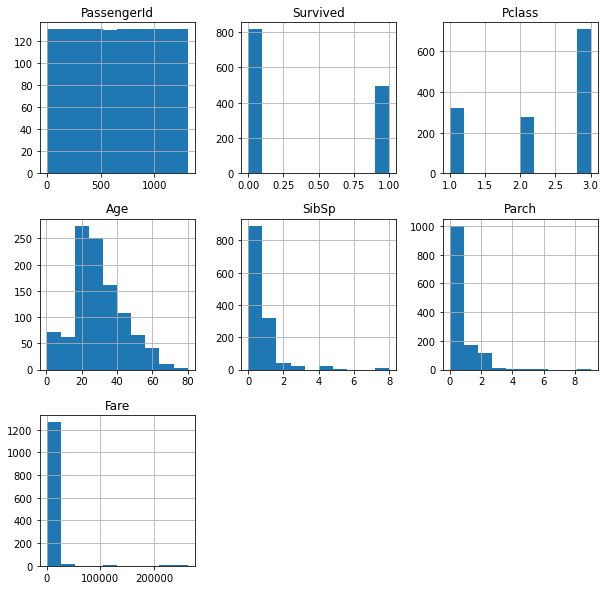

In [4]:
df.hist(figsize=(10,10))
plt.show()

Die einfachen Histogramme zeigen bereits:
- 500 der 1300 Reisenden überlebten, das sind ca. 40%. 
- Etwa 300 Personen reisten jeweils in erster und zweiter Klasse, doppelt so viele reisten in dritter Klasse. 
- Die meisten Reisenden an Bord waren zwischen 20 und 40 Jahre alt. 
- Die meisten reisten ohne Angehörige.
- Beim Fahrpreis gab es wenige sehr teure Tickets, die Verteilung bei den günstigen Tickets lässt sich auf dieser Grafik nicht weiter erkennen. 

An dieser Stelle können geeignete Visualisierungen schon sehr aufschlußreich sein. Ein Beispiel finden Sie im folgenden Arbeitsauftrag:

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> 

Eine Visualisierung des Anteils der Überlebenden zu einem Merkmal, z.B. zur Passagierklasse, könnte erste Hinweise auf ein gutes Modell liefern. Um dies einfach umzusetzen, ist die Bibliothek seaborn und dort der Befehl countplot sehr hilfreich. Schauen Sie in der Dokumentation von searborn nach und versuchen Sie es! Achtung: Am Besten neuen Tab öffnen! 

Tipp: Binden Sie die Bibliothek `seaborn` mit dem Kürzel `sns`ein und führen Sie im Anschluss den Befehl `sns.countplot(...)` aus. Eingabeparameter sind für `x` die Passagierklasse, für `hue` die Spalte mit dem Merkmal Überleben und für `data` den Datensatz. <br> Durch Ändern von `x='Pclass'` in ein anderes Merkmal können Sie dies auch für andere Merkmale tun. 
</div>

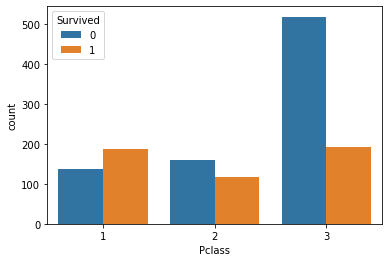

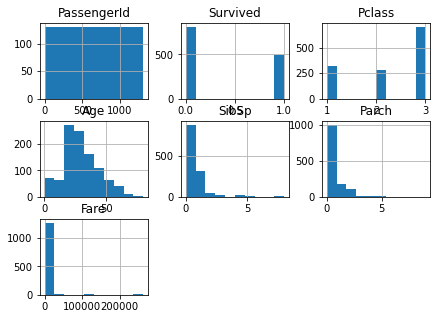

In [5]:
import seaborn as sns
sns.countplot(x='Pclass', hue='Survived', data=df)
df.hist(figsize=(7,5))
plt.show()

Aus dieser Darstellung zeigt sich bereits, dass Reisende der untersten Passagierklasse im Vergleich zu den beiden anderen Passagierklassen zu einem geringeren Anteil überlebt haben.

<div class="alert alert-block alert-warning">
<b>Ergebnissicherung:</b> <br>
    - Der Arbeitsbereich Datenverständnis dient dazu, sich einen Überblick über die vorliegenden Daten zu verschaffen. Dabei sollten die Daten in Hinblick auf ihre Eigenschaften und Qualität und die dadurch ggf. auftretenden Probleme für die Aufgabenstellung analysiert werden.
</div>

<div class="alert alert-block alert-info">
<b>Information:</b> <br>
    - Mehr Informationen zu Datentypen sind in Modul 1, Video 2 zu finden. <br>
    - Mehr Informationen zu Datenverständnis sind in Modul 3, Video 2 zu finden. </div>

## 3. Datenvorbereitung (Data preparation) <a name="kap3"></a>

Bei der Datenvorbereitung wird ein Datensatz so weit vorbereitet, dass er anschließend für die Modellierung genutzt werden kann. Dabei sind viele Aspekte zu beachten:
- Fehlende Daten werden ergänzt.
- Der Datentyp wird überprüft und ggf. geändert.
- Es werden die Merkmale ausgewählt, die Einfluss auf die Zielvariable haben. 
- ...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Offenbar ist der Datensatz nicht vollständig. Eine Ergänzung der fehlenden Daten erscheint, gerade bei dem Merkmal `Cabin` aber schwierig. Dieser Punkt wird zunächst zurückgestellt und dann betrachtet, sobald die Merkmale für die spätere Analyse ausgewählt wurden. 

Daten mit numerischem Typ können von Python besser analysiert und verarbeitet werden, deshalb sollen zunächst alle Merkmale vom Typ `object` betrachtet werden, um zu sehen, ob sie in Zahlen umgewandelt werden können: 

- Beim Merkmal Namen ist dies nicht sinnvoll.
- Das Merkmal `Sex` könnten durch `male`='männlich' mit 0 und `female`='weiblich' mit 1 umkodiert werden. 
- Das Merkmal `Ticket` beinhaltet eine unverständliche Buchstaben-Nummern-Kombination und bleibt deswegen unverändert. 
- Das Merkmal `Cabin` enthält nur wenige Daten und ist deswegen uninteressant. 
- Das Merkmal `Embarked` könnte mit Hilfe von Zahlen umkodiert werden, wegen des geringen zu erwartenden Einflusses wird dies zunächst nicht durchgeführt. 

In [7]:
df.loc[df.Sex =='male', 'Sex']=0
df.loc[df.Sex =='female', 'Sex']=1

Die Änderungen werden durch die Betrachtung der Daten überprüft: 

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Das Geschlecht ist immer noch vom Typ `object`. 

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> 
    
Nutzen Sie die Dokumentation von Python oder eine Suchmaschine (Achtung: Am Besten neuen Tab öffnen!) dazu, herauszufinden, wie sich der Datentyp der Spalte `df['Sex']` in `float` umwandeln lässt. Wenden Sie den passenden Befehl anschließend an. 
    
Tipp: Eine Möglichkeit ist in der Pandas Bibliothek zu finden. 
</div>

In [10]:
df['Sex'] = df['Sex'].astype(float)

Die nachfolgende Ausgabe zeigt, dass das Vorgehen erfolgreich war. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   float64
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


### 3.1 Aufteilung in Trainings- und Testdatensatz <a name="kap31"></a>

Beim überwachten Lernen wird der Datensatz in Trainings- und Testdatensatz aufgeteilt. Der Testdatensatz soll völlig unabhängig von allen späteren Entscheidungen sein, um damit die Güte der Vorhersage testen können. Daher wird diese Trennung üblicherweise vor der Merkmalsauswahl vorgenommen.

Im folgenden Abschnitt wird der Datensatz aufgeteilt. Die Größe des Testdatensatzsatzes soll 30 % betragen (`test_size=0.3`). Mit `random_state=0` wird sichergestellt, dass immer die gleichen 30% Testdaten ausgewählt werden (die Ergebnisse des Modells fallen sonst bei jeder Durchführung etwas anders aus), `stratify` sorgt dafür, dass nach der Teilung in Trainings- und Testmenge die Verteilung in den beiden Mengen der der Ausgangsmenge entspricht, das bedeutet der Anteil der Überlebenden ist in beiden Mengen gleich. 

An dieser Stelle wird zum ersten Mal die Bibliothek sklearn benutzt. Sie ist die beliebteste Bibliothek für maschinelles Lernen in Python und enthält viele wichtigen Befehle aus diesem Bereich.

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.3, random_state=0, stratify = df['Survived'])
print(train_set)

      PassengerId  Survived  Pclass  \
867           868         0       1   
1230         1231         0       3   
238           239         0       2   
12             13         0       3   
521           522         0       3   
...           ...       ...     ...   
1256         1257         1       3   
1232         1233         0       3   
906           907         1       2   
1239         1240         0       2   
403           404         0       3   

                                               Name  Sex   Age  SibSp  Parch  \
867            Roebling, Mr. Washington Augustus II  0.0  31.0      0      0   
1230                          Betros, Master. Seman  0.0   NaN      0      0   
238                 Pengelly, Mr. Frederick William  0.0  19.0      0      0   
12                   Saundercock, Mr. William Henry  0.0  20.0      0      0   
521                                 Vovk, Mr. Janko  0.0  22.0      0      0   
...                                             ...

<div class="alert alert-block alert-info">
<b>Information:</b> <br>
    - Mehr Informationen zum Aufteilen von Trainings- und Testdaten sind in Modul 2, Video 1 zu finden.</div>

### 3.2 Erste Merkmalsauswahl <a name="kap32"></a>

Zur Datenvorbereitung gehört die Entscheidung, welche Merkmale für die Modellierung betrachtet werden. So hat beispielsweise der Name der Reisenden offensichtlich keinen Einfluss auf das Überleben.

Bei anderen Merkmalen stellt sich die Frage nach dem Einfluss aber:
- Hat das Alter der Reisenden Einfluss auf ihren Überlebenswillen?
- Haben Reisende mit vielen Angehörigen an Bord sich bemüht, sie zu retten und dabei das eigene Überleben riskiert?
- Hat das Geschlecht Einfluss auf das Überleben? Haben sich Männer zuerst in die Rettungsboote gesetzt oder wurde nach dem Grundsatz "Frauen und Kinder zuerst" gehandelt?

Eine Idee für den Einfluss eines numerischen Merkmals auf ein anderes gibt der Korrelationskoeffizient.
Der Korrelationskoeffizient wird zwischen zwei Merkmalen berechnet und sein Wert liegt immer zwischen -1 und 1. Dabei bedeutet ein Wert nahe 0, dass zwei Merkmale sich gegenseitig nicht beeinflussen. Ein positiver Wert bedeutet, dass bei steigenden Werten des einen Merkmals auch die Werte des anderen Merkmals steigen. Je näher der Korrelationskoeffizient an 1 liegt, desto besser lässt sich das Verhältnis anhand einer Geraden mit positiver Steigung darstellen. Ein negativer Korrelationskoeffizient sagt aus, dass bei steigenden Werten des einen Merkmals die Werte des anderen Merkmals fallen. Je näher der Wert an -1 liegt, desto besser lässt sich das Verhältnis anhand einer Geraden mit negativer Steigung darstellen.

Ein Überblick über die Korrelationskoeffizienten lässt sich mit einem einfachen Befehl erzeugen. 

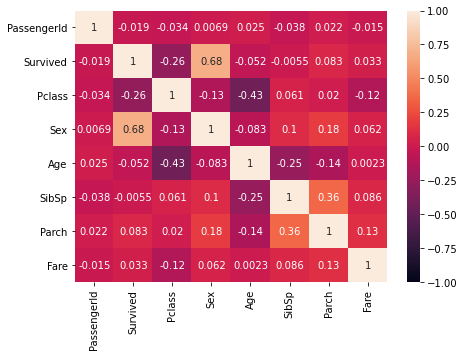

In [13]:
import seaborn as sns
corr_matrix = train_set.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.show()

Den betragsmäßig größten Korrelationskoeffizienten mit dem Zielmerkmal `Survived` hat das Geschlecht (0.68), dann folgt die Passagierklasse (-0,26) und die Anzahl der Eltern/Kinder (0,08). Alle anderen Merkmale weisen eine betragsmäßige Korellation <0,05 auf, sodass hier nicht mehr von einem Einfluss auf `Survived` gesprochen werden kann. 

Zunächst werden für die Modellierung deswegen ausschließlich diese beiden Merkmale und natürlich `Survived` betrachtet. Die Auswahl wird im nächsten Schritt durchgeführt, das Zielmerkmal wird als `y` (abhängige Variable), die Menge aus Geschlecht und Passagierklasse als `X` (unabhängige Variable) gespeichert: 

In [14]:
X_train=train_set[['Sex', 'Pclass']]
X_train.info()
y_train=train_set[['Survived']]

X_test=test_set[['Sex', 'Pclass']]
X_test.info()
y_test=test_set[['Survived']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 867 to 403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     916 non-null    float64
 1   Pclass  916 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 21.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 1270 to 932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     393 non-null    float64
 1   Pclass  393 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 9.2 KB


Die Ansicht zeigt, dass bezüglich der ausgewählten Merkmale keine `NaN` Einträge vorhanden sind, deshalb kann mit der Modellierung begonnen werden. 

<div class="alert alert-block alert-warning">
<b>Ergebnissicherung:</b> <br>
    - Der Arbeitsbereich Datenvorbereitung dient dazu, den Datensatz so zu bereinigen und vorzubereiten, dass mit diesem die Modellierung vorgenommen werden kann.
</div>

<div class="alert alert-block alert-info">
<b>Information:</b> <br>
    - Mehr Informationen zur Datenvorbereitung sind in Modul 3, Video 2 zu finden. </div>

## 4. Modellierung <a name="kap4"></a>

Nun wird mit Hilfe der ausgewählten Merkmale aus den Trainingsdaten ein Modell zur Vorhersage des Überlebens der Reisenden erstellt. Das Modell, welches hier genutzt wird, ist ein Entscheidungsbaum (Decision Tree). 

Die folgende Zelle importiert das Modul zur Nutzung von Entscheidungbäumen und iniziiert dann einen Baum mit Tiefe 2 (`max_depth = 2`), es dürfen also zwei Unterscheidungsebenen erstellt werden.

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [16]:
tree_clf.predict([[1,3]])

array([1])

Um das Modell zu visualisieren, wird mit dem folgenden Befehl der entstandene Baum ausgegeben.

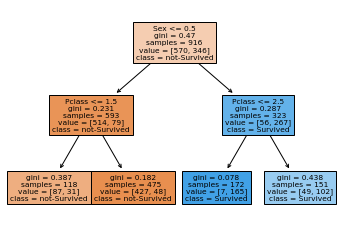

In [17]:
from sklearn import tree
tree.plot_tree(tree_clf, feature_names = X_train.columns, class_names=['not-Survived', 'Survived'], filled=True); 

Das erste Modell wurde erfolgreich erzeugt. Die Visualisierung zeigt eine Entscheidung auf zwei Entscheidungsebenen, die erste nach dem Geschlecht, die zweite nach der Passagierklasse. Die Ausgabe (und Farbe) auf der untersten Ebene zeigt jedoch, dass in dem entstanden Modell alleine die Information über das Geschlecht des Reisenden einen Einfluss hat. 

<div class="alert alert-block alert-info">
<b>Information:</b> <br>
    - Mehr Informationen zur Interpretation der Grafik sind in Modul 2, Video 2 zu finden <br>
    - Mehr Informationen zu unterschiedlichen Modellen sind in den Modulen 4 bis 7 zu finden. </div>

<div class="alert alert-block alert-warning">
<b>Ergebnissicherung:</b> <br>
    - Der Arbeitsbereich Modellierung dient dazu, die für den Datensatz geeigneten Methoden des Data Minings zu ermitteln und anzuwenden. Dabei werden die Parameter der Modelle optimiert und häufig verschiedene Modelle erstellt und verglichen.
</div>

### 4.1 Modellgüte <a name="kap41"></a>

Ein erster Ansatz, um die Güte eines Modells einzuschätzen, ist die Trefferquote des Ziel-Merkmals bezüglich der Trainingsdaten und bezüglich der Testdaten. Dies wird in der folgenden Zelle berechnet:

In [18]:
print(tree_clf.score(X_train, y_train))
print(tree_clf.score(X_test, y_test))

0.8526200873362445
0.8600508905852418


Für die Trainingsdaten sind 85,26 % der Vorhersagen richtig, für die Testdaten sogar 86,01 %. Gar nicht schlecht!

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b>
    
Eine weitere Möglichkeit, die Güte eines Modells zu überprüfen ist die Konfusionsmatrix. Um diese zu nutzen, ist die Funktion `confusion_matrix` aus dem metrics Modul sehr hilfreich. Schauen Sie in der Dokumentation von sklearn nach und versuchen Sie es! (Achtung: Am Besten neuen Tab öffnen!)

Tipp: Importieren Sie aus der Bibliothek `sklearn` das Modul `metrics` und nutzen Sie dann den Befehl `metrics.confusion_matrix(...)` mit der durch das Modell ermittelten Klasse und der tatsächlichen Klasse als Eingabeparametern.<br>
    
Frage: Was könnten die Einträge der ausgegebenen Matrix bedeuten?   
</div>

In [23]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, tree_clf.predict(X_test)))

[[220  25]
 [ 30 118]]


Die Konfusionsmatrix gibt uns genauer Erkenntnisse über die Art der falschen Vorhersagen:

- In 220 Fällen wurde das Nichtüberleben vorhergesagt und es ist auch so eingetreten.
- In 30 Fällen wurde das Nichtüberleben vorhergesagt, in Wahrheit ist es der reisenden Person aber geglückt.
- In 25 Fällen wurde das Überleben vorhergesagt, in Wahrheit hat die reisende Person aber nicht überlebt.
- In 118 Fällen wurde das Überleben vorhergesagt und es ist auch so eingetreten. 

Das erste Modell könnte nun herausgegeben werden, es ist aber sinnvoller, noch einmal die vorhergehenden Schritte durchzugehen und zu überlegen, ob es mit einem neuen Durchlauf noch verbessert werden kann.


<div class="alert alert-block alert-info">
<b>Information:</b> <br>
    - Mehr Informationen zur Modellvalidierung sind Modul 5, Video 2 zu finden. </div>

<div class="alert alert-block alert-warning">
<b>Ergebnissicherung:</b> <br>
    - Der Arbeitsbereich Evaluation dient dazu, die erstellten Modelle qualitativ zu bewerten, diese mit der Aufgabenstellung abzugleichen und das beste Modell auszuwählen.
</div>

### 4.2 Iteration zu den vorhergehenden Schritten <a name="kap42"></a>

Bei diesem Schritt handelt es sich nicht um einen eigenen Arbeitsbereich, sondern vielmehr um die systematische Wiederholung der vorhergehenden Arbeitsbereiche für eine potentielle Verbesserung des Modells, beispielsweise anhand folgender Fragen: 
- Sollte versucht werden, fehlende Werte durch geschätzte Werte zu ersetzen, um nicht so viele Daten herauslöschen zu müssen?
- Können andere oder mehr Merkmale verwendet werden, um das Modell zu erstellen? 
- Kann eine Veränderung der Modellparameter zu einem verbesserten Modell führen? 

In diesem Fall werden die folgenden Schritte ausporbiert:
- In `Age` und `Fare` werden die fehlenden Werte durch Mittelwerte ersetzt. 
- Es werden zusätzlich die Merkmale `Parch`, `Age` und `Fare` für die Modellierung betrachtet.
- Der Entscheidungsbaum darf sich bis zu einer Tiefe von 3 aufbauen. 

In [ ]:
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].mean()
df.loc[df['Fare'].isnull(), 'Fare'] = df['Fare'].mean()

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=0, stratify = df['Survived'])
X_train=train_set[['Sex', 'Pclass', 'Parch', 'Age', 'Fare']]
y_train=train_set[['Survived']]

X_test=test_set[['Sex', 'Pclass', 'Parch', 'Age', 'Fare']]
y_test=test_set[['Survived']]

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth = 3)  
tree_clf.fit(X_train, y_train)

In [ ]:
tree.plot_tree(tree_clf, feature_names = X_train.columns, class_names=True, filled=True);

In [ ]:
print(tree_clf.score(X_train, y_train))
print(tree_clf.score(X_test, y_test))

Das Modell hat sich durch diese Schritte ein wenig verbessert: Statt einer Korrektklassifikationsrate von 86,01 % auf dem Testdatensatz wird nun ein Wert von 86,51% erreicht und anders als in unserem ersten Modell wird das Überleben nicht mehr allein auf Basis des Geschlechts entschieden. 

Es kann beobachtet werden, dass sich ein Modell nicht durch schlichtes Ausprobieren optimieren lässt.

<div class="alert alert-block alert-info">
<b>Information:</b> <br>
    - Mehr Informationen zur Interpretation der Grafik sind in Modul 3, Video 1 zu finden.</div>

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> 

Nutzen Sie die nachfolgend vorgegebenen Bausteine, um mit der Auswahl der Merkmale und der Tiefe des Baums zu experimentieren, indem Sie die Bausteine einkommentieren und mit Parametern befüllen. <br>
</div>

In [ ]:
# Baustein zum Trennen von Trainingsdaten und Testdaten
# train_set, test_set = train_test_split(df, test_size=0.3, random_state=0, stratify = df['Survived'])
# X_train=train_set[[ ]]
# y_train=train_set[['Survived']]
# X_train.info()

# X_test=test_set[[ ]]
# X_test.info()
# y_test=test_set[['Survived']]

In [ ]:
# Baustein zum Fitten und Ausgeben des Modells und seiner Güte
#tree_clf_v2 = DecisionTreeClassifier(max_depth = 3)  
#tree_clf_v2.fit(X_train, y_train)
#tree.plot_tree(tree_clf_v2, feature_names = X_train.columns, class_names=True, filled=True) 
#print(tree_clf_v2.score(X_train, y_train))
#print(tree_clf_v2.score(X_test, y_test))

## 5. Evaluation <a name="kap5"></a>

Die Evaluation führt zurück zur ursprünglichen Aufgabenstellung:

<hr style="border:4px solid lightblue"> </hr> 

Für das Titanic VR-Erlebnis soll nun das erstellte Vorhersagemodell eingesetzt werden.  
Führen Sie die Zellen aus und tragen Sie beliebige Werte in die angezeigten Felder ein, um Ihr Vorhersagemodell zu testen!  

<b>Hätten Sie auf der Titanic überlebt?</b>

<hr style="border:4px solid lightblue"> </hr> 

In [ ]:
from IPython.display import display 
import ipywidgets as widgets 
from ipywidgets import interact, Layout 

In [ ]:
style = {'description_width': 'initial'}

# Dropdown-Widget für Geschlecht
dd1 = widgets.Dropdown(options=['Weiblich', 'Männlich'], value='Weiblich', description='Geschlecht: ');display(dd1);

# Dropdown-Widget für Passagierklasse
dd2 = widgets.Dropdown(options=[1, 2, 3], value=1, description='Passagierklasse: ', style=style);display(dd2);

# IntSlider-Widget für Anzahl Eltern/Kinder 
is1 = widgets.IntSlider(value=0,min=0, max=10, step=1, description='Anzahl Verwandter an Bord: ', style=style);display(is1); 

# Text-Eingabefeld für Alter 
tb1 = widgets.Text(value='40', description='Alter: ');display(tb1); 

# IntSlider-Widget für Tickepres 
is2 = widgets.Text(value='0', description='Ticketpreis: ');display(is2); 

In [ ]:
# AUSGABE: Überlebt oder nicht überlebt?

s = dd1.value
if s == 'Männlich': s = 0
else: s =1

df_user = pd.DataFrame([[s, dd2.value, is1.value, int(tb1.value), is2.value]])

if tree_clf.predict(df_user) == 1: print('Sie hätten auf der Titanic überlebt!') 
    # Hier wird das oben erstellte Modell tree_clf für die Vorhersage benutzt
else: print('Sie hätten auf der Titanic leider nicht überlebt!')

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> 
    
Ändern Sie die Eingabeparameter auf Ihre eigenen Daten und führen Sie anschließend die darunter liegende Zelle erneut aus.<br>
Variieren Sie anschließend die Parameter mehrmals und führen die Zelle aus. Was fällt Ihnen auf?<br>
</div> 

Werden die Eingabeparameter geändert, so fällt auf, dass sich die Entscheidung, ob ein Charakter überlebt oder nicht, auf der obersten Stufe am Geschlecht orientiert. Während bei Auswahl von _Weiblich_ noch weitere Parameter über das Überleben entscheiden, wird bei Auswahl von _Männlich_ immer ein Nichtüberleben vorhergesagt. Tatsächlich überlebten nur etwa ein Fünftel der Männer, während drei Viertel der Frauen überlebten. Das Modell ist jedoch für das VR-Erlebnis nicht geeignet, da in der Simulation abgebildet werden soll, dass auch Männer das Unglück überlebt haben.
Um den Sachverhalt besser darstellen zu können, ist also ein besseres Modell nötig. Zellen, die fehlende Einträge enthielten, können beispielsweise ergänzt werden. Die fehlenden Einträge für das Alter könnten geschätzt und entsprechend ausgefüllt werden, der Zustiegsort und andere Größen können als potentielle Merkmale betrachtet und auch andere Modellarten können erstellt und genutzt werden. Außerdem gibt es auch noch weitere Klassifikationsverfahren, die das Problem evtl. besser lösen können. 

Die Module dieses Kurses erläutern und vertiefen die verschiedenen Schritte des Data Mining und zeigen Methoden zur Bildung und Interpretation geeigneter Modelle für vielfältige Anwendungsfälle. 

## 6. Bereitstellung <a name="kap6"></a>

Im letzten Schritt wird das final ausgewählte Modell veröffentlicht und eingesetzt. Dazu gehört auch eine umfassende Dokumentation über das Modell und seine Qualität, sowie bei Einsatz in einen laufenden Prozess möglicherweise die Implementation einer Überwachung bzw. stetigen Weiterentwicklung des Modells.

Für das VR-Erlebnis muss das Modell so angepasst und optimiert werden, dass es für die Charakterwahl und die Entscheidung über den Verlauf der Simulation eingesetzt werden kann.